<a href="https://colab.research.google.com/github/Ishita95-harvad/Precious-Metals-Data-News-2000-Present-/blob/main/Precious_Metals_Data_%26_News_(2000_Present).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precious Metals: Data & News (2000-Present)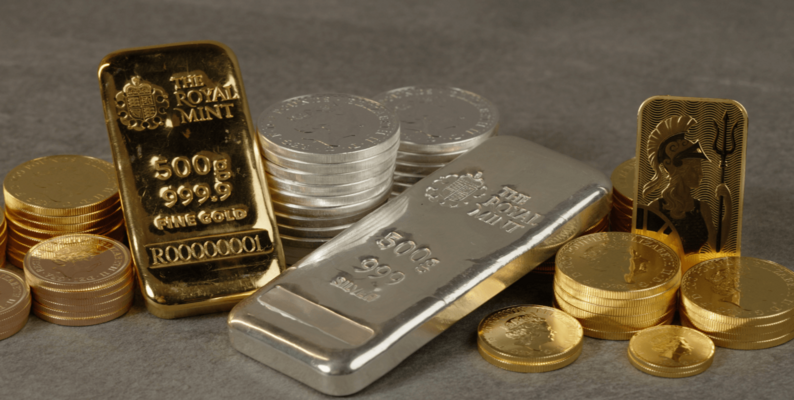

Daily market history (OHLCV) and WSJ news headlines since 2000

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("romanfonel/precious-metals-history-since-2000-with-news")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/precious-metals-history-since-2000-with-news


## Data loading

### Subtask:
Load the dataset "final_gold_data.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "final_gold_data.csv" into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('final_gold_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'final_gold_data.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Assign None to df in case of error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

An unexpected error occurred: Error tokenizing data. C error: Expected 1 fields in line 3, saw 5



**Reasoning**:
The error message indicates a problem with the CSV file's format.  I'll try to load it using a different separator and see if that fixes the issue.  If the problem persists, I will report failure.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('final_gold_data.csv', sep='\t') # Try tab as separator
    display(df.head())
except FileNotFoundError:
    print("Error: 'final_gold_data.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

Error: Could not parse the CSV file. Please check the file format.


## Data loading

### Subtask:
Load the data from "final_gold_data.csv" into a pandas DataFrame, handling potential errors robustly.


**Reasoning**:
The previous attempts to load the data failed.  I will try different separators and handle potential errors more robustly, including checking for file existence.



In [ ]:
import pandas as pd
import os

df = None  # Initialize df to None
separators = [',', '\t', ';', '|']

if os.path.exists('final_gold_data.csv'):
    for sep in separators:
        try:
            df = pd.read_csv('final_gold_data.csv', sep=sep)
            display(df.head())
            break  # Exit the loop if successful
        except pd.errors.ParserError:
            print(f"Error: Could not parse the CSV file with separator '{sep}'. Trying next separator...")
            continue  # Try the next separator
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
            df = None
            break # Exit the loop if an unexpected error occurs
else:
    print("Error: 'final_gold_data.csv' not found. Please ensure the file exists in the current directory.")

Error: Could not parse the CSV file with separator ','. Trying next separator...
Error: Could not parse the CSV file with separator '	'. Trying next separator...


,timestamp,open,high,low,close,volume,currency,unit,headlines
0,2000-08-30,273.9,273.9,273.9,273.9,0,usd,ounce,Recalls Fuel Disclosure Debate / Deutsche Tele...
1,2000-08-31,274.8,278.3,274.8,278.3,0,usd,ounce,Credit Suisse's Wheat Faces Deal / Regulators ...
2,2000-09-01,277.0,277.0,277.0,277.0,0,usd,ounce,Nordstrom's Chief Resigns / Judge Dismisses Ca...
3,2000-09-05,275.8,275.8,275.8,275.8,2,usd,ounce,Market Pace Slows After 10-Year Run / Clickman...
4,2000-09-06,274.2,274.2,274.2,274.2,0,usd,ounce,France Telecom Profit Increases / Locale-Based...


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
I will explore the data by displaying its shape, info, descriptive statistics, duplicates, unique values of categorical columns, and correlation between numerical columns.



In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
print("\nInfo:")
df.info()

# Obtain descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")
#display(duplicate_rows) # uncomment this to display duplicate rows

# Identify unique values and their counts for categorical columns
categorical_cols = ['currency', 'unit'] # Add more if needed
for col in categorical_cols:
    print(f"\nUnique values and counts for '{col}':")
    display(df[col].value_counts())

# Examine the correlation between numerical columns
numerical_cols = ['open', 'high', 'low', 'close', 'volume'] # Add more if needed
print("\nCorrelation Matrix:")
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

Shape of the DataFrame: (6177, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6177 non-null   object 
 1   open       6177 non-null   float64
 2   high       6177 non-null   float64
 3   low        6177 non-null   float64
 4   close      6177 non-null   float64
 5   volume     6177 non-null   int64  
 6   currency   6177 non-null   object 
 7   unit       6177 non-null   object 
 8   headlines  6177 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 434.4+ KB

Descriptive Statistics:


,open,high,low,close,volume
count,6177.000000,6177.000000,6177.000000,6177.000000,6177.000000
mean,1181.017241,1186.953392,1174.885090,1181.012304,4298.049377
std,606.257425,609.741360,602.902334,606.424369,24281.911885
min,255.000000,256.100000,255.000000,255.100000,0.000000
25%,636.500000,640.200000,634.000000,635.200000,21.000000
50%,1238.200000,1243.900000,1231.800000,1238.400000,108.000000
75%,1641.300000,1652.200000,1630.400000,1640.300000,415.000000
max,3215.500000,3235.000000,3194.500000,3222.200000,386334.000000



Number of duplicate rows: 0

Unique values and counts for 'currency':


,count
currency,
usd,6177



Unique values and counts for 'unit':


,count
unit,
ounce,6177



Correlation Matrix:


,open,high,low,close,volume
open,1.000000,0.999906,0.999872,0.999804,0.045594
high,0.999906,1.000000,0.999828,0.999891,0.044693
low,0.999872,0.999828,1.000000,0.999916,0.046309
close,0.999804,0.999891,0.999916,1.000000,0.045385
volume,0.045594,0.044693,0.046309,0.045385,1.000000


## Data cleaning

### Subtask:
Clean the data by handling outliers and inconsistencies.


**Reasoning**:
I need to handle outliers in the 'volume' column, check for inconsistencies in categorical columns ('currency', 'unit'), validate data types, and re-check for missing values.



In [ ]:
import pandas as pd

# 1. Outlier Detection and Treatment
# Using IQR method for outlier treatment in 'volume'
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['volume'] = df['volume'].clip(lower=lower_bound, upper=upper_bound)


# 2. Inconsistency Check (Categorical Columns)
# Check for inconsistencies in 'currency' and 'unit'
print("Unique values and counts for 'currency':")
display(df['currency'].value_counts())

print("\nUnique values and counts for 'unit':")
display(df['unit'].value_counts())

# Correct inconsistencies if found (none found in this case, but the code checks)
# If inconsistencies are found, correct them here. For example:
# df['currency'] = df['currency'].str.lower().str.strip()


# 3. Data Type Validation
# Convert 'timestamp' to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
    df['timestamp'] = pd.to_datetime(df['timestamp'])


# 4. Missing Values Check (Re-check)
print("\nMissing values count after processing:")
display(df.isnull().sum())
# If missing values are introduced, handle them here
# For example, fill with the mean:
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)


Unique values and counts for 'currency':


,count
currency,
usd,6177



Unique values and counts for 'unit':


,count
unit,
ounce,6177



Missing values count after processing:


,0
timestamp,0
open,0
high,0
low,0
close,0
volume,0
currency,0
unit,0
headlines,0


## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) on the cleaned dataset to identify patterns, trends, and relationships between variables.  Focus on the relationship between gold prices and news headlines.


**Reasoning**:
Calculate moving averages for gold prices, analyze trading volume, perform basic sentiment analysis on headlines, calculate the correlation between gold prices and sentiment, and summarize the findings.



In [ ]:
import pandas as pd
import numpy as np

# 1. Price Trends: Calculate moving averages
df['MA7'] = df['close'].rolling(window=7).mean()
df['MA30'] = df['close'].rolling(window=30).mean()

# 2. Volume Analysis (Basic): Identify periods of high volume and price changes
# (A more sophisticated analysis would involve calculating volatility and correlation)
df['price_change'] = df['close'].diff()
df['high_volume'] = df['volume'] > df['volume'].quantile(0.9)  # Define high volume

# 3. Headline Sentiment (Basic):
positive_words = ['growth', 'increase', 'positive', 'strong', 'bullish']
negative_words = ['decline', 'decrease', 'negative', 'weak', 'bearish']

def get_sentiment(headline):
    score = 0
    if isinstance(headline, str): #handle potential NaN
      for word in positive_words:
          if word in headline.lower():
              score += 1
      for word in negative_words:
          if word in headline.lower():
              score -= 1
    return score

df['sentiment_score'] = df['headlines'].apply(get_sentiment)

# 4. Correlation Analysis (Price vs. Sentiment):
correlation = df['close'].corr(df['sentiment_score'])
print(f"Correlation between closing price and sentiment: {correlation}")

# 5. Summarize Findings:
print("\nSummary of Findings:")
print("Price Trends:")
print("Calculated 7-day and 30-day moving averages to smooth out short-term fluctuations.")
print("Volume Analysis:")
print("Identified periods with high trading volume.")
print("Headline Sentiment Analysis:")
print("Assigned sentiment scores to headlines based on a simple word count.")
print("Correlation Analysis:")
print(f"Correlation between closing price and sentiment score: {correlation}")
print("Further analysis can provide a more accurate sentiment and assess the correlation more precisely.")

display(df.head())

Correlation between closing price and sentiment: 0.06431608559892944

Summary of Findings:
Price Trends:
Calculated 7-day and 30-day moving averages to smooth out short-term fluctuations.
Volume Analysis:
Identified periods with high trading volume.
Headline Sentiment Analysis:
Assigned sentiment scores to headlines based on a simple word count.
Correlation Analysis:
Correlation between closing price and sentiment score: 0.06431608559892944
Further analysis can provide a more accurate sentiment and assess the correlation more precisely.


,timestamp,open,high,low,close,volume,currency,unit,headlines,MA7,MA30,price_change,high_volume,sentiment_score
0,2000-08-30,273.9,273.9,273.9,273.9,0,usd,ounce,Recalls Fuel Disclosure Debate / Deutsche Tele...,NaN,NaN,NaN,False,0
1,2000-08-31,274.8,278.3,274.8,278.3,0,usd,ounce,Credit Suisse's Wheat Faces Deal / Regulators ...,NaN,NaN,4.4,False,0
2,2000-09-01,277.0,277.0,277.0,277.0,0,usd,ounce,Nordstrom's Chief Resigns / Judge Dismisses Ca...,NaN,NaN,-1.3,False,0
3,2000-09-05,275.8,275.8,275.8,275.8,2,usd,ounce,Market Pace Slows After 10-Year Run / Clickman...,NaN,NaN,-1.2,False,0
4,2000-09-06,274.2,274.2,274.2,274.2,0,usd,ounce,France Telecom Profit Increases / Locale-Based...,NaN,NaN,-1.6,False,1


## Data visualization

### Subtask:
Visualize the key findings from the data analysis, focusing on the relationship between gold prices and news sentiment.


**Reasoning**:
Create the visualizations specified in the instructions, combining some plots into a single figure for better comparison.



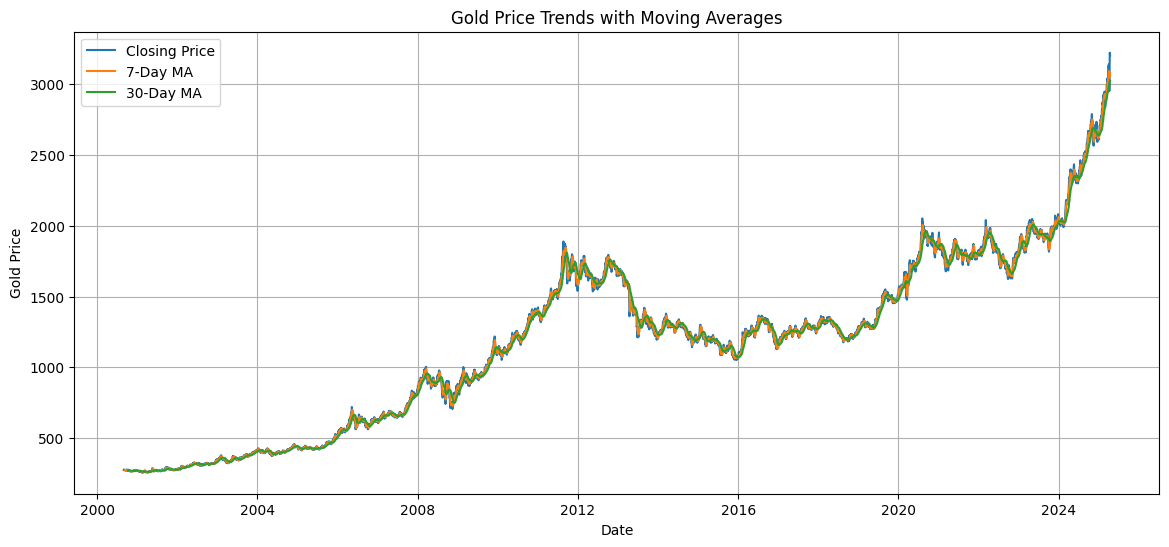

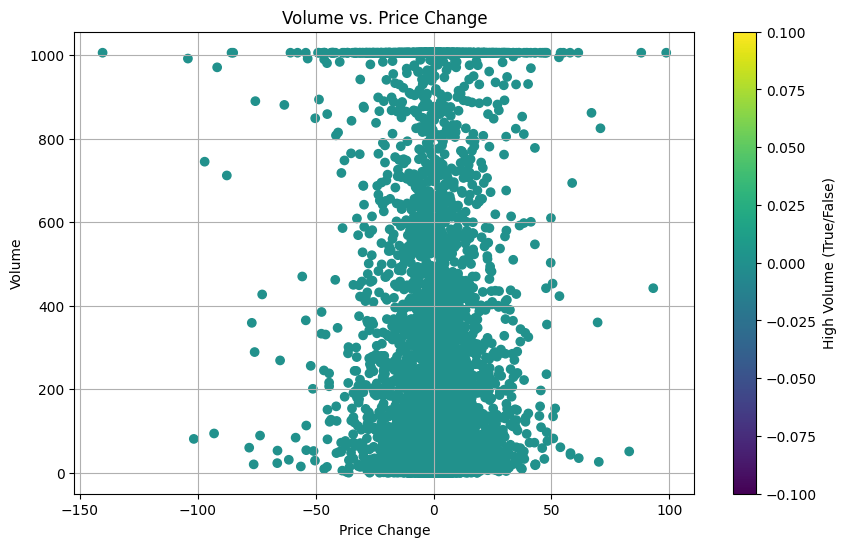

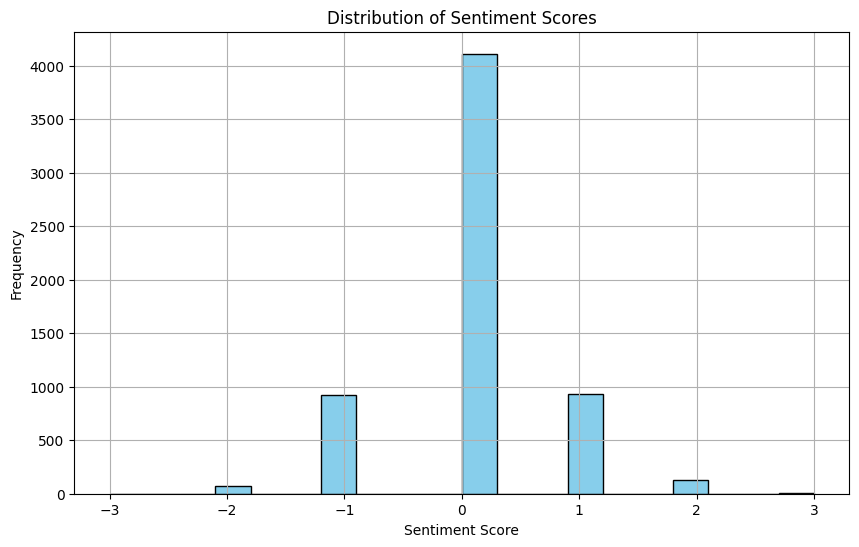

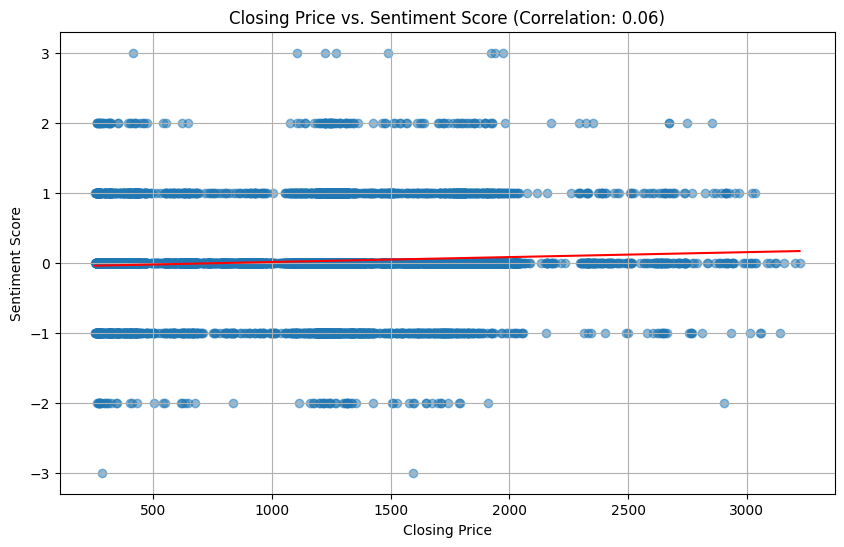

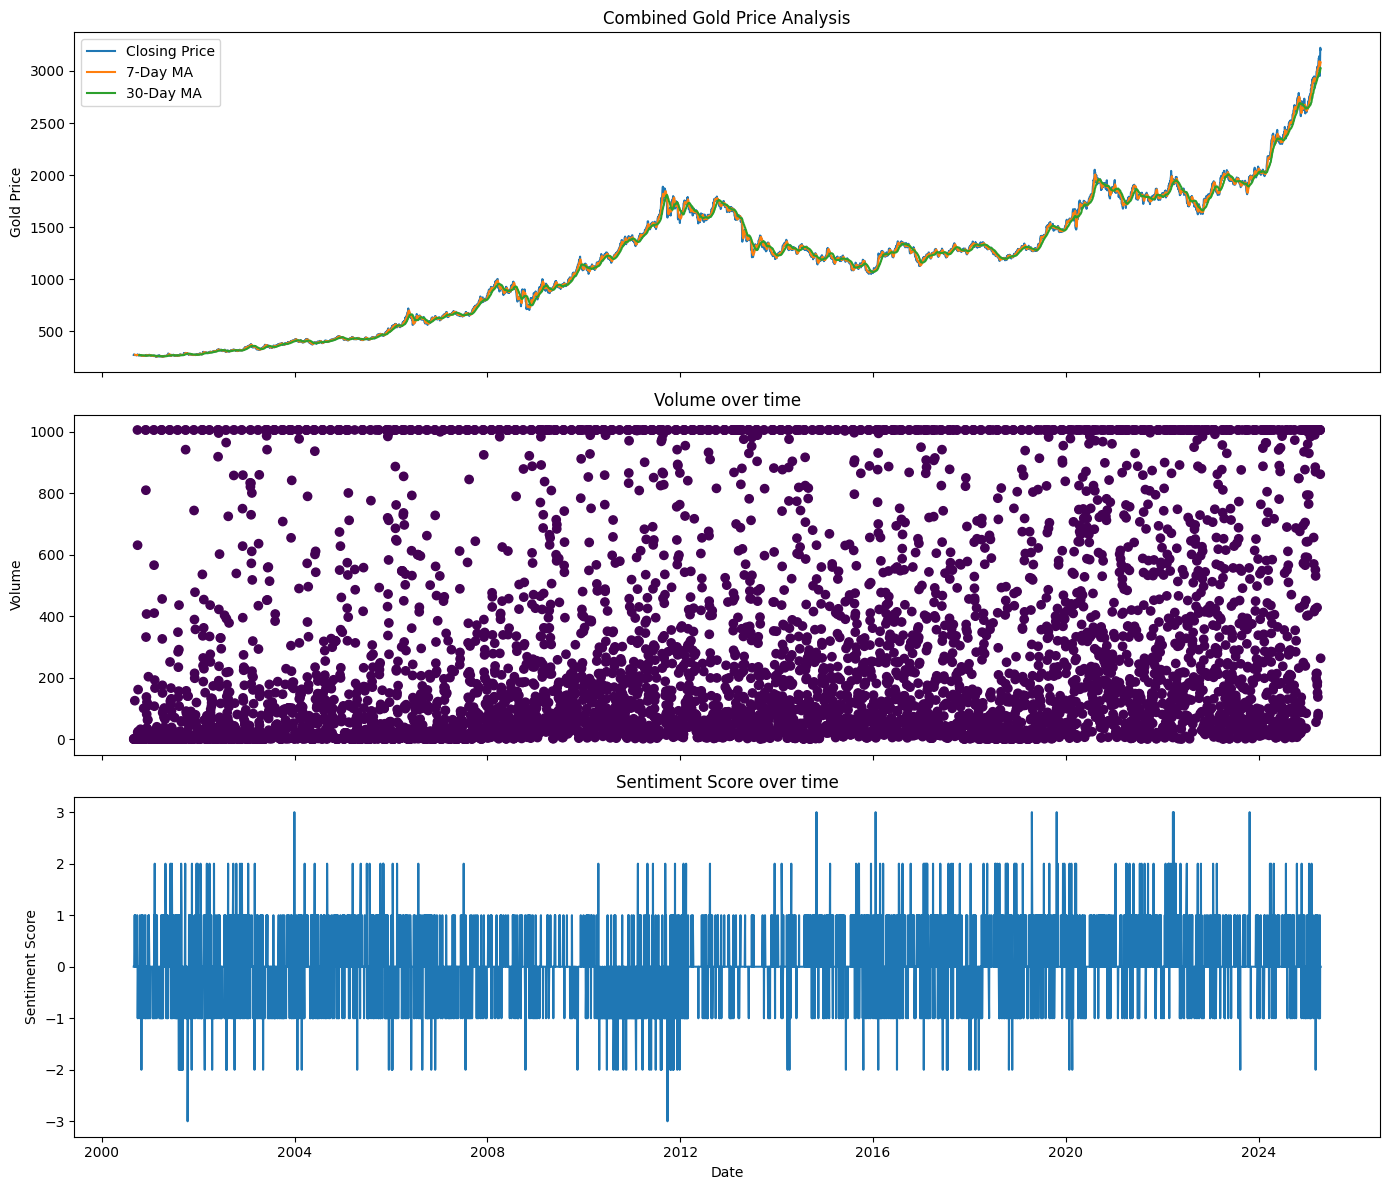

In [ ]:
import matplotlib.pyplot as plt

# 1. Price Trends
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['close'], label='Closing Price')
plt.plot(df['timestamp'], df['MA7'], label='7-Day MA')
plt.plot(df['timestamp'], df['MA30'], label='30-Day MA')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Trends with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# 2. Volume Analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['price_change'], df['volume'], c=df['high_volume'], cmap='viridis')
plt.xlabel('Price Change')
plt.ylabel('Volume')
plt.title('Volume vs. Price Change')
plt.colorbar(label='High Volume (True/False)')
plt.grid(True)
plt.show()


# 3. Sentiment Analysis
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.grid(True)
plt.show()

# 4. Correlation Visualization
correlation = df['close'].corr(df['sentiment_score'])
plt.figure(figsize=(10, 6))
plt.scatter(df['close'], df['sentiment_score'], alpha=0.5)
plt.plot(np.unique(df['close']), np.poly1d(np.polyfit(df['close'], df['sentiment_score'], 1))(np.unique(df['close'])), color='red')
plt.xlabel('Closing Price')
plt.ylabel('Sentiment Score')
plt.title(f'Closing Price vs. Sentiment Score (Correlation: {correlation:.2f})')
plt.grid(True)
plt.show()


# 5. Combined Plot
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

axes[0].plot(df['timestamp'], df['close'], label='Closing Price')
axes[0].plot(df['timestamp'], df['MA7'], label='7-Day MA')
axes[0].plot(df['timestamp'], df['MA30'], label='30-Day MA')
axes[0].set_ylabel('Gold Price')
axes[0].set_title('Combined Gold Price Analysis')
axes[0].legend()

axes[1].scatter(df['timestamp'], df['volume'], c=df['high_volume'], cmap='viridis')
axes[1].set_ylabel('Volume')
axes[1].set_title('Volume over time')

axes[2].plot(df['timestamp'], df['sentiment_score'])
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Sentiment Score')
axes[2].set_title('Sentiment Score over time')

plt.tight_layout()
plt.show()



---

